In [ ]:
#data inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('dress_dataset_1000.csv')

In [3]:
df.head()

,Weather,Color Palette,Pattern,Feeling,Clothing Fit,Dress Name,Description
0,Windy,Neutral,Stripes,Trendy,Tight,Bodycon,"A form-fitting dress that hugs the body, often..."
1,Snowy,Earth,Geometric,Unique,Oversized,Long Sleeve,"A dress with long sleeves, often featuring pas..."
2,Sunny,Bright,Floral,Casual,Loose,Tunic,"A comfortable, long top that can be worn as a ..."
3,Windy,Neutral,Stripes,Trendy,Tight,Peplum,A dress with a flared ruffle attached at the w...
4,Windy,Neutral,Stripes,Trendy,Tight,Shirt,"A relaxed, button-down dress with a loose fit,..."


In [4]:
#to check the data types and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Weather        1000 non-null   object
 1   Color Palette  1000 non-null   object
 2   Pattern        1000 non-null   object
 3   Feeling        1000 non-null   object
 4   Clothing Fit   1000 non-null   object
 5   Dress Name     1000 non-null   object
 6   Description    1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [5]:
df.describe()

,Weather,Color Palette,Pattern,Feeling,Clothing Fit,Dress Name,Description
count,1000,1000,1000,1000,1000,1000,1000
unique,4,4,4,4,4,20,20
top,Snowy,Earth,Geometric,Unique,Oversized,Sweater,"A warm dress made of sweater material, often f..."
freq,259,259,259,259,259,61,61


In [6]:
df.isnull().sum()

Weather          0
Color Palette    0
Pattern          0
Feeling          0
Clothing Fit     0
Dress Name       0
Description      0
dtype: int64

In [7]:
df.nunique()

Weather           4
Color Palette     4
Pattern           4
Feeling           4
Clothing Fit      4
Dress Name       20
Description      20
dtype: int64

In [8]:
n=0
for i in (df.duplicated()):
    if(i=='True'):
        n=n+1
print("The number of duplicates in the dataset are: ",n) 

The number of duplicates in the dataset are:  0


In [9]:
col= df.columns

In [10]:
for i in col:
    count_value=df[i].value_counts().to_frame()
    print(f"The value counts of {i} is {count_value}")




The value counts of Weather is           count
Weather        
Snowy       259
Sunny       255
Pleasant    244
Windy       242
The value counts of Color Palette is                count
Color Palette       
Earth            259
Bright           255
Pastel           244
Neutral          242
The value counts of Pattern is               count
Pattern            
Geometric       259
Floral          255
Solid colors    244
Stripes         242
The value counts of Feeling is                count
Feeling             
Unique           259
Casual           255
Sophisticated    244
Trendy           242
The value counts of Clothing Fit is               count
Clothing Fit       
Oversized       259
Loose           255
Standard        244
Tight           242
The value counts of Dress Name is                count
Dress Name          
Sweater           61
Turtleneck        59
Maxi              59
Tunic             58
Shift             57
Knit Sweater      56
Peplum            54
Boho Midi         51
Wr

In [11]:
col

Index(['Weather', 'Color Palette', 'Pattern', 'Feeling', 'Clothing Fit',
       'Dress Name', 'Description'],
      dtype='object')

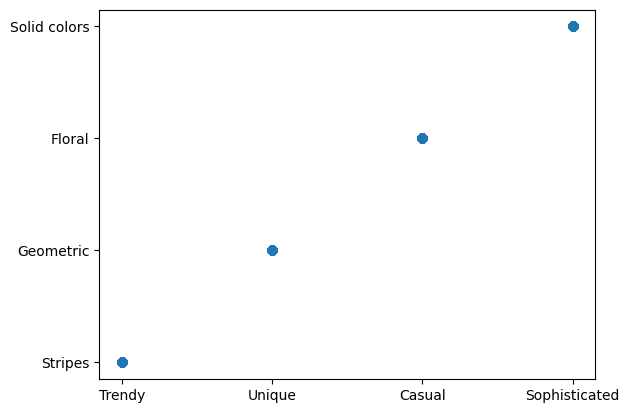

In [12]:
y=df["Pattern"]
x=df["Feeling"]
plt.scatter(x,y)

In [13]:
col

Index(['Weather', 'Color Palette', 'Pattern', 'Feeling', 'Clothing Fit',
       'Dress Name', 'Description'],
      dtype='object')

In [14]:
#Using group by 
df_test= df[['Color Palette','Feeling','Dress Name']]
df_grp=df_test.groupby(['Color Palette','Feeling'],as_index=False).count()
df_grp

,Color Palette,Feeling,Dress Name
0,Bright,Casual,255
1,Earth,Unique,259
2,Neutral,Trendy,242
3,Pastel,Sophisticated,244


In [15]:
df_test= df[['Pattern','Feeling','Dress Name']]
df_grp=df_test.groupby(['Pattern','Feeling'],as_index=False).count()
df_grp

,Pattern,Feeling,Dress Name
0,Floral,Casual,255
1,Geometric,Unique,259
2,Solid colors,Sophisticated,244
3,Stripes,Trendy,242


In [16]:
#pivot table 
df_test= df[['Color Palette','Feeling','Dress Name']]
df_grp=df_test.groupby(['Color Palette','Feeling'],as_index=False).count()
df_pivot=df_grp.pivot(index='Color Palette',columns='Feeling')
df_pivot

Dress Name                            
Feeling           Casual Sophisticated Trendy Unique
Color Palette                                       
Bright             255.0           NaN    NaN    NaN
Earth                NaN           NaN    NaN  259.0
Neutral              NaN           NaN  242.0    NaN
Pastel               NaN         244.0    NaN    NaN

In [17]:
df_test= df[['Pattern','Feeling','Dress Name']]
df_grp=df_test.groupby(['Pattern','Feeling'],as_index=False).count()
df_pivot=df_grp.pivot(index='Pattern',columns='Feeling')
df_pivot

Dress Name                            
Feeling          Casual Sophisticated Trendy Unique
Pattern                                            
Floral            255.0           NaN    NaN    NaN
Geometric           NaN           NaN    NaN  259.0
Solid colors        NaN         244.0    NaN    NaN
Stripes             NaN           NaN  242.0    NaN

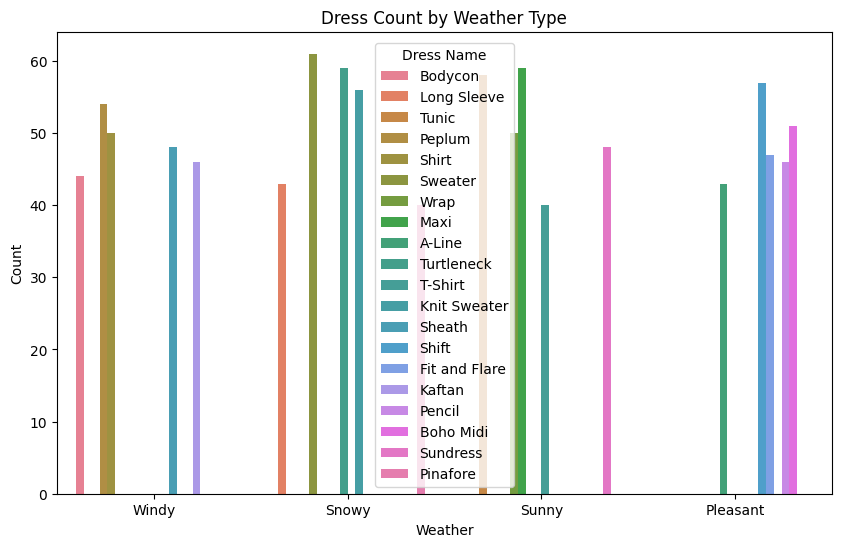

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather', hue='Dress Name')
plt.title('Dress Count by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title='Dress Name')
plt.show()


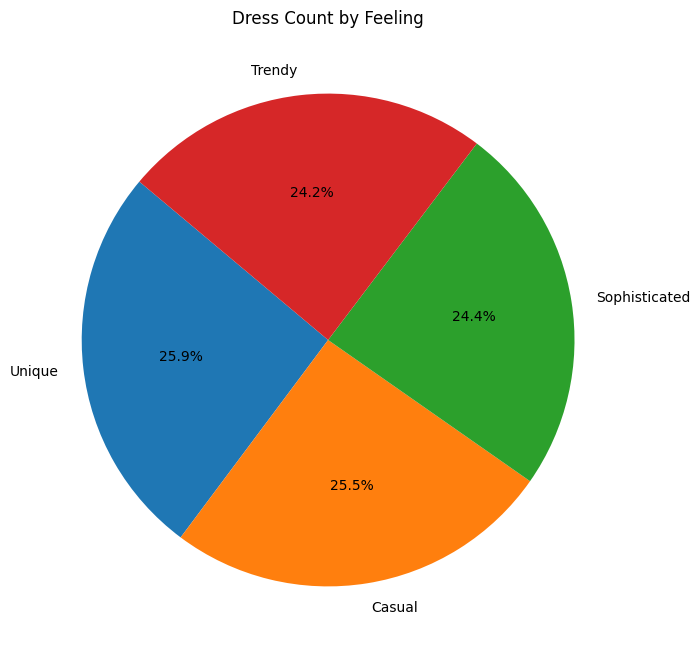

In [19]:
feeling_counts = df['Feeling'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(feeling_counts, labels=feeling_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dress Count by Feeling')
plt.show()


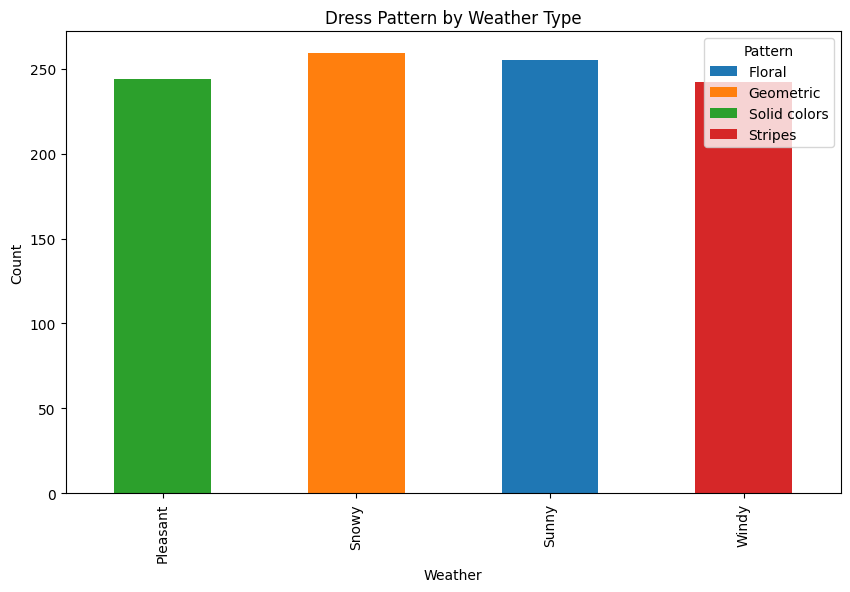

In [20]:
pattern_weather = df.groupby(['Weather', 'Pattern']).size().unstack()
pattern_weather.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dress Pattern by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title='Pattern')
plt.show()


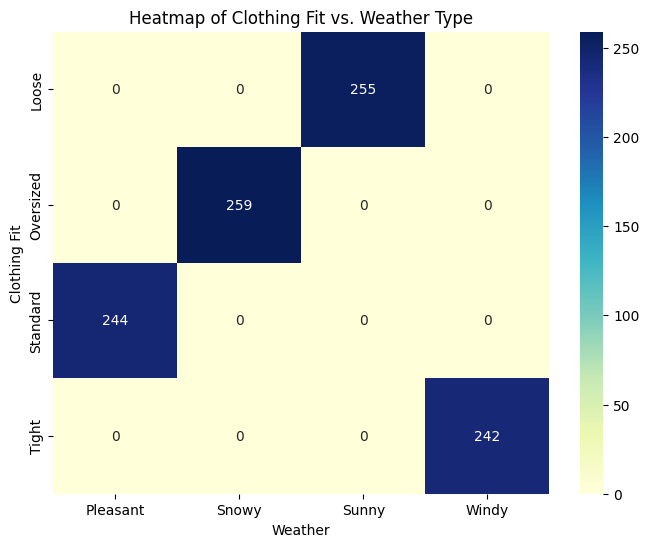

In [21]:
heatmap_data = df.pivot_table(index='Clothing Fit', columns='Weather', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Clothing Fit vs. Weather Type')
plt.xlabel('Weather')
plt.ylabel('Clothing Fit')
plt.show()


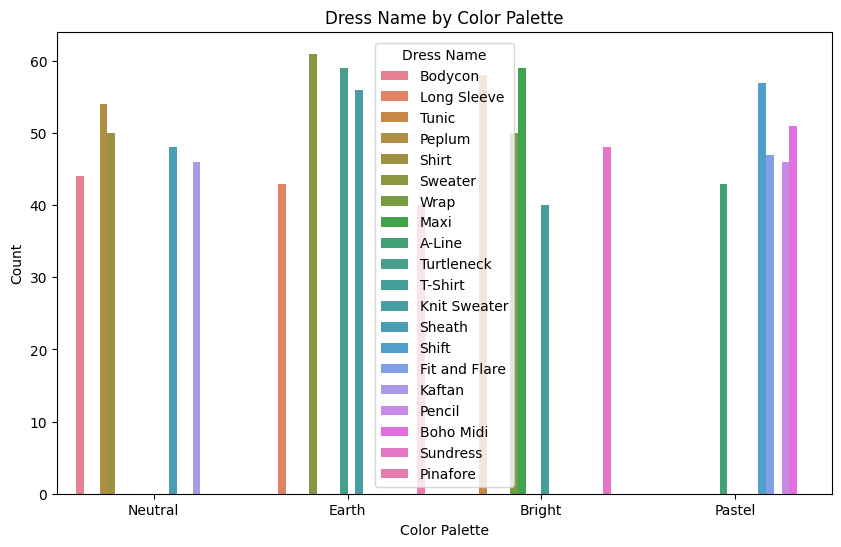

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color Palette', hue='Dress Name')
plt.title('Dress Name by Color Palette')
plt.xlabel('Color Palette')
plt.ylabel('Count')
plt.legend(title='Dress Name')
plt.show()


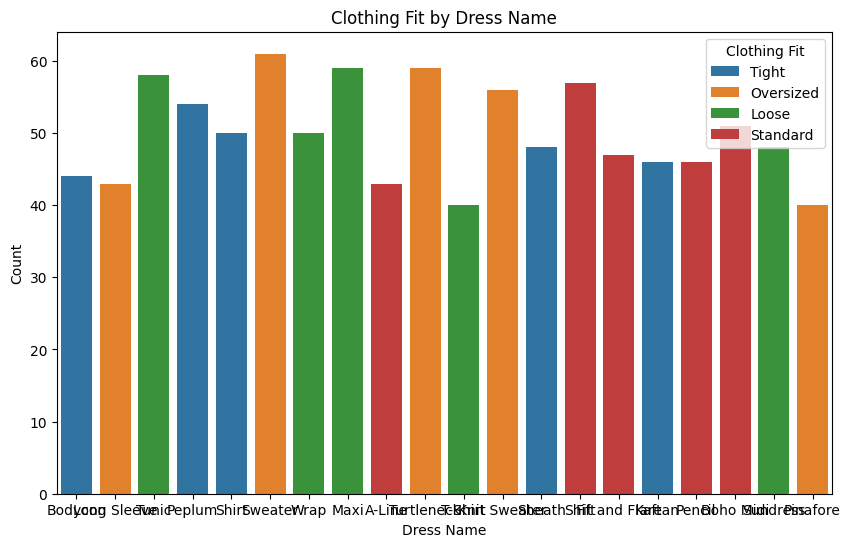

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dress Name', hue='Clothing Fit')
plt.title('Clothing Fit by Dress Name')
plt.xlabel('Dress Name')
plt.ylabel('Count')
plt.legend(title='Clothing Fit')
plt.show()
